<a href="https://colab.research.google.com/github/kimkat27/LE1_Tripulca_K/blob/main/Slump_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SlumpTest using Linear Regression**

This is all about Concrete slump test that has 10 features and 103 instances.

***Additional Information***
The data set includes 103 data points. There are 7 input variables, and 3 output variables in the data set. The initial data set included 78 data. After several years, we got 25 new data points.

Concrete is a highly complex material. The slump flow of concrete is not only determined by the water content, but that is also influenced by other concrete ingredients.

In [77]:
# Importing necessary libraries
import pandas as pd # for us to display our dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import copy
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [99]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/LE1_Tripulca_K/dataset/slump_test.csv')

# Initial dataset size
initial_rows, initial_cols = df.shape

# Handle null values
null_values_count = df.isnull().sum().sum()
if null_values_count > 0:
    print(f"{null_values_count} null values found in the dataset. Handling null values...")
    df.dropna(inplace=True)
    print("Null values have been removed.")

# Handle duplicates
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print(f"{duplicates_count} duplicate rows found in the dataset. Handling duplicates...")
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been removed.")

# Drop unnecessary columns
columns_to_drop = ['No']
df = df.drop(columns=columns_to_drop, axis=1)

  # Updated dataset size
updated_rows, updated_cols = df.shape

# Display basic information about the dataset after cleaning
print("\nDataset Information After Cleaning:")
print(df.info())

# Display summary statistics of the dataset after cleaning
print("\nSummary Statistics After Cleaning:")
print(df.describe())

# Summary of cleaning process
print("\nCleaning Summary:")
print(f"Initial Dataset Size: {initial_rows} rows, {initial_cols} columns")
print(f"Updated Dataset Size: {updated_rows} rows, {updated_cols} columns")
print(f"Rows Removed: {initial_rows - updated_rows}")
print(f"Columns Removed: {initial_cols - updated_cols}")


Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB
None

Summary Statistics After Cleani

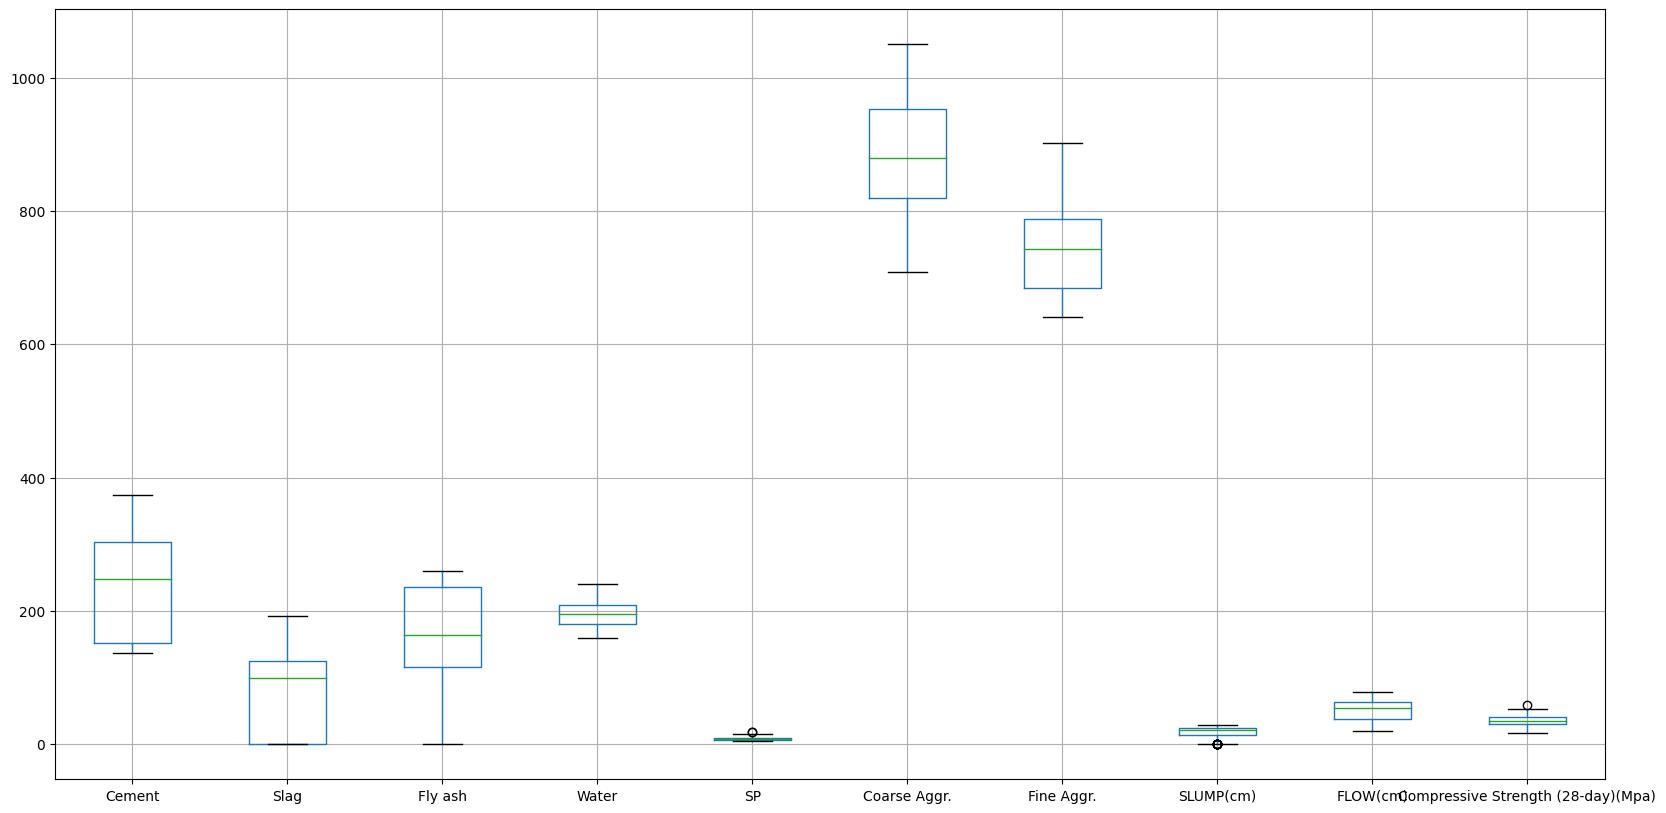

In [100]:
#Checking after handling outliers
plt.figure(figsize = (20,10))
df.boxplot();

No outliers found or already removed.


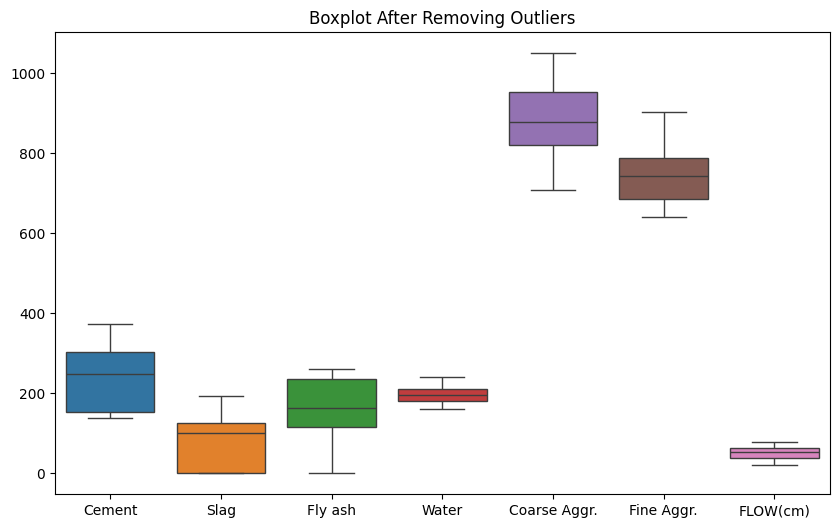

In [101]:
# Original shape of the dataframe
original_shape = df.shape

# Remove outliers
Q1 = df.drop(columns=['SP', 'SLUMP(cm)', 'Compressive Strength (28-day)(Mpa)']).quantile(0.25)
Q3 = df.drop(columns=['SP', 'SLUMP(cm)', 'Compressive Strength (28-day)(Mpa)']).quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df.drop(columns=['SP', 'SLUMP(cm)', 'Compressive Strength (28-day)(Mpa)']) < (Q1 - 1.5 * IQR)) | (df.drop(columns=['SP', 'SLUMP(cm)', 'Compressive Strength (28-day)(Mpa)']) > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check if outliers have been removed
if original_shape != df_no_outliers.shape:
    print("Outliers have been removed.")
else:
    print("No outliers found or already removed.")

# Plot boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers.drop(columns=['SP', 'SLUMP(cm)', 'Compressive Strength (28-day)(Mpa)']))
plt.title('Boxplot After Removing Outliers')
plt.show()

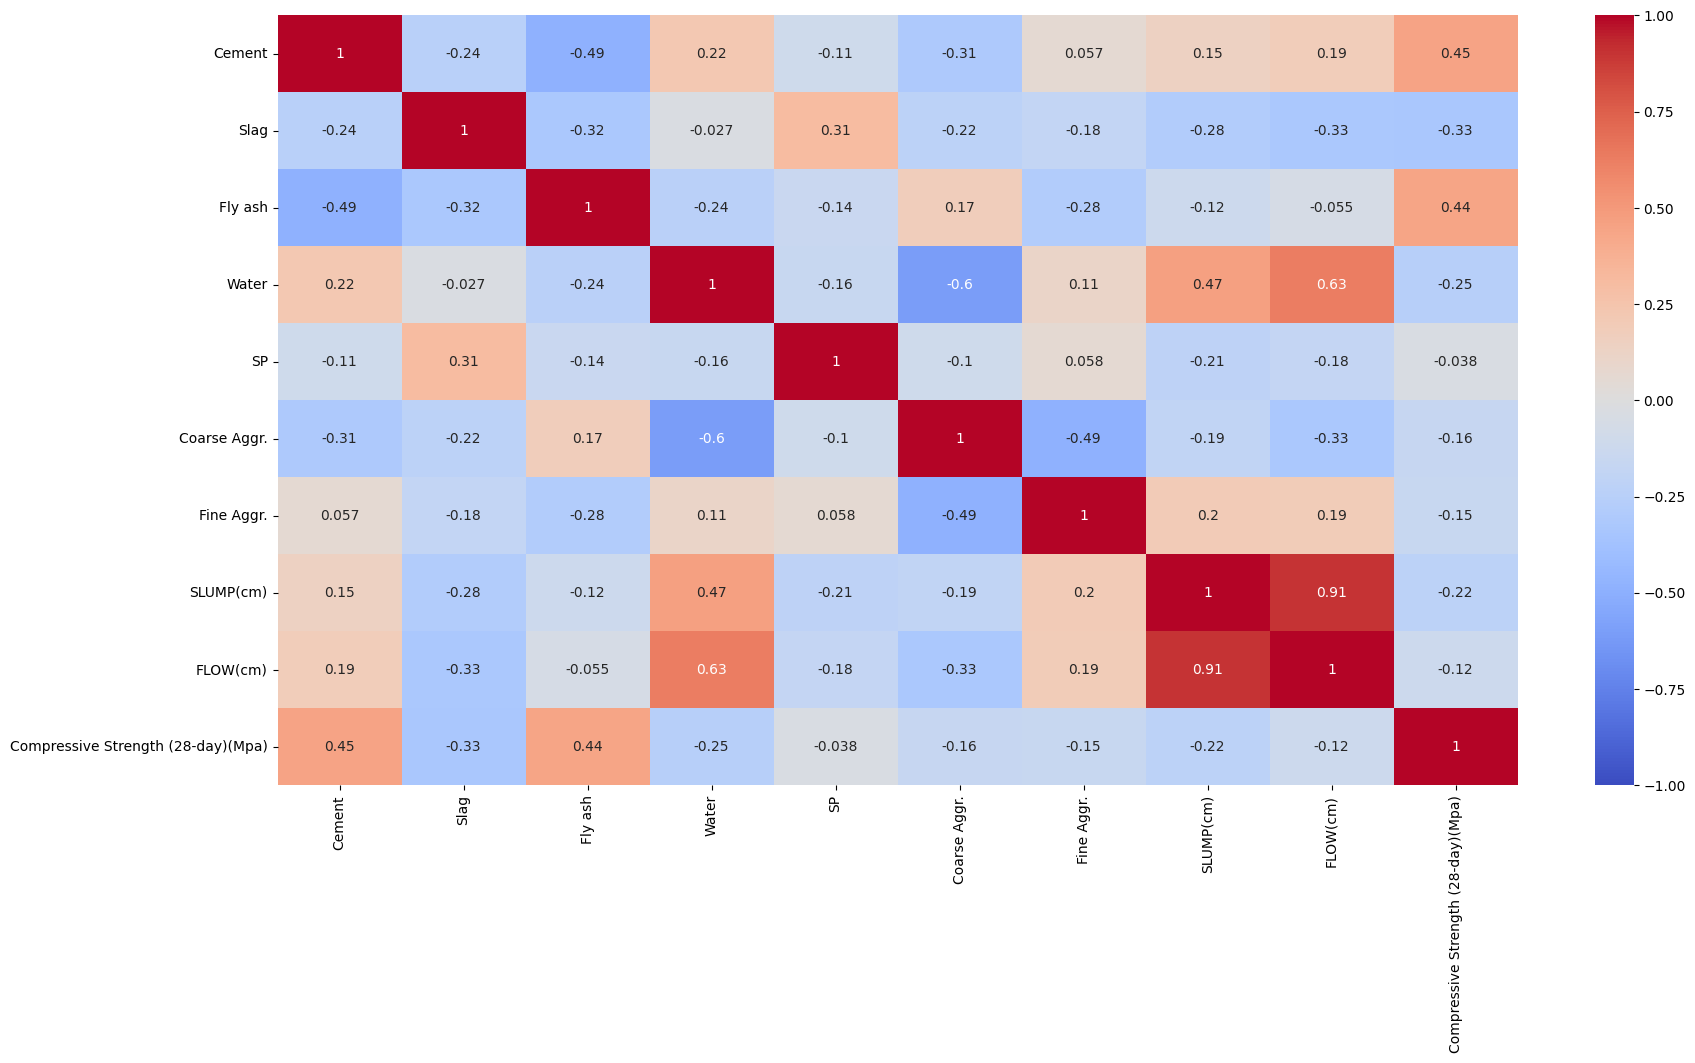

In [102]:
#checking multicollinearity
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Selected Features based on importance:
Index(['Water', 'SLUMP(cm)', 'FLOW(cm)'], dtype='object')


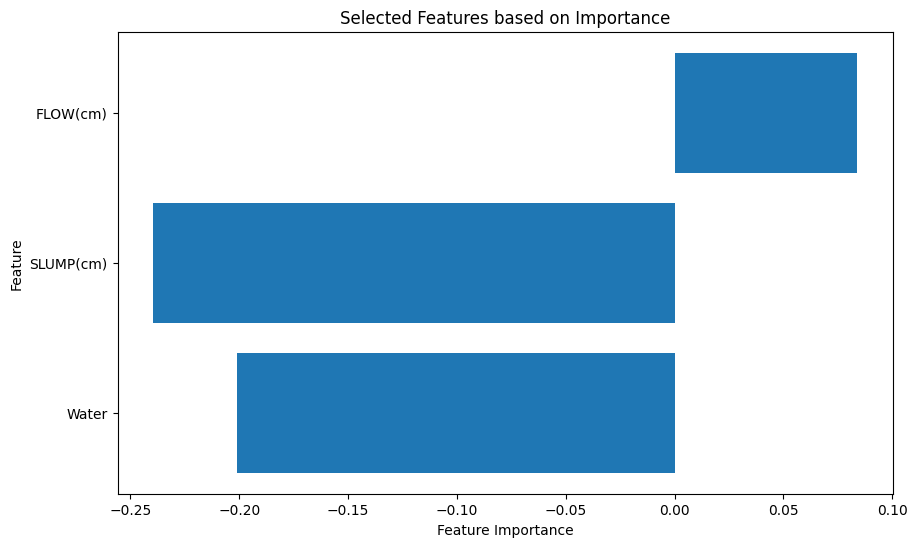

In [103]:
# Handling multicollinearity by selecting best features based on importance

# Define your regression model (e.g., Linear Regression or Random Forest Regressor)
model = LinearRegression()

# Fit the model to your data
model.fit(X_train, y_train)

# Evaluate feature importance (if applicable to the model)
if hasattr(model, 'coef_'):
    feature_importance = model.coef_
else:
    # For tree-based models, use feature_importances_
    feature_importance = model.feature_importances_

# Select features based on importance
selector = SelectFromModel(model, threshold='mean')
selector.fit(X_train, y_train)

# Get selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get names of selected features
selected_features = X_train.columns[selected_feature_indices]

# Print selected features
print("Selected Features based on importance:")
print(selected_features)

# Plotting selected features based on importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(selected_features)), feature_importance[selected_feature_indices], align='center')
plt.yticks(range(len(selected_features)), selected_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Selected Features based on Importance')
plt.show()

In [105]:
# Data Splitting
X = df.drop("Compressive Strength (28-day)(Mpa)", axis=1)
y = df["Compressive Strength (28-day)(Mpa)"]

Graphical Analysis

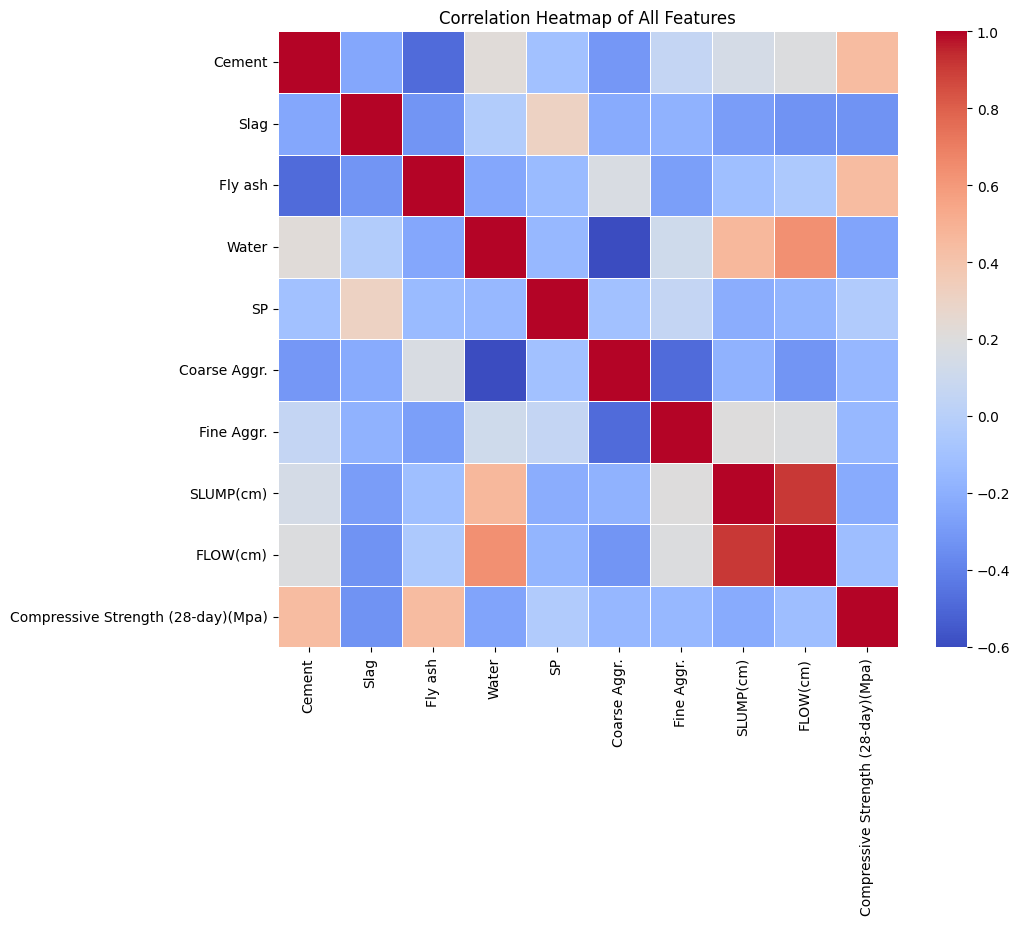

Linear Regression Model Accuracy: 0.9119795179382073


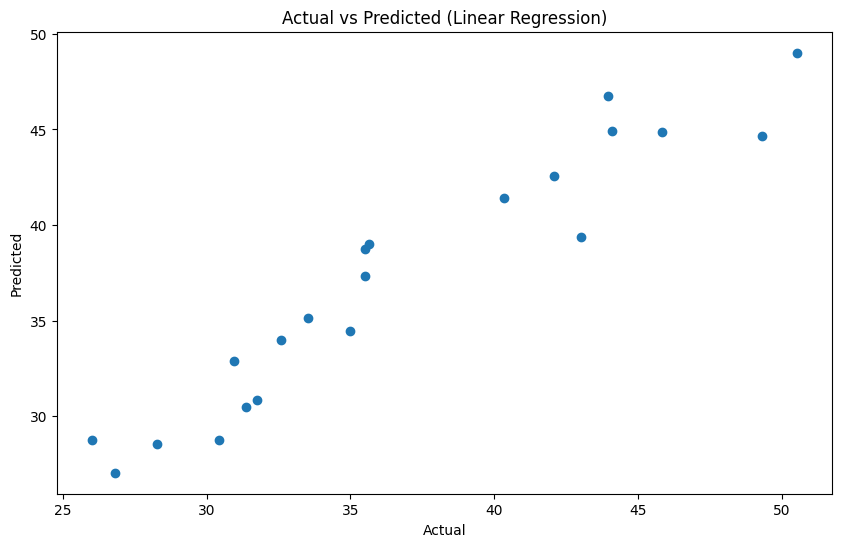

In [106]:
# Calculate correlation matrix for all features
correlation_matrix_all = df.corr()the next is

# Plot correlation heatmap for all features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg_model.predict(X_test)

# Evaluate the model
linear_reg_accuracy = linear_reg_model.score(X_test, y_test)
print("Linear Regression Model Accuracy:", linear_reg_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

In [107]:
# Data Leakage Prevention
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,8.200000e+01,82.000000,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01
mean,2.978647e-17,0.000000,1.218537e-16,-6.539484e-16,6.295777e-17,4.088870e-16,2.349069e-16,-5.144936e-17,-2.437075e-17
std,1.006154e+00,1.006154,1.006154e+00,1.006154e+00,1.006154e+00,1.006154e+00,1.006154e+00,1.006154e+00,1.006154e+00
min,-1.180229e+00,-1.297210,-1.649362e+00,-1.781644e+00,-1.423970e+00,-2.054253e+00,-1.582879e+00,-1.960431e+00,-1.591123e+00
25%,-9.903178e-01,-1.295158,-3.768276e-01,-8.399961e-01,-8.743235e-01,-7.078243e-01,-8.808308e-01,-3.489879e-01,-9.182109e-01
50%,2.001016e-02,0.360864,2.083110e-01,-9.401561e-02,-2.903240e-01,-8.442514e-02,8.820468e-02,4.150585e-01,1.892908e-01
75%,9.334834e-01,0.800008,1.037447e+00,5.663605e-01,4.997930e-01,7.379493e-01,7.214955e-01,7.067852e-01,8.369690e-01
max,1.820369e+00,1.871189,1.191117e+00,2.131697e+00,3.591555e+00,1.838719e+00,2.621368e+00,1.262455e+00,1.661287e+00


In [108]:
# Model Training and Evaluation
lm = LinearRegression()
pipeline_lm = Pipeline([("scaler", scaler), ("lm", lm)])
pipeline_lm.fit(X_train_scaled, y_train)
y_pred = pipeline_lm.predict(X_test_scaled)
y_train_pred = pipeline_lm.predict(X_train_scaled)

pipeline_lm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [110]:
#Model Evaulation
# Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):

    scores = {model_name + "_train" : {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse": np.sqrt(mean_squared_error(y_train, y_train_pred))},

              model_name + "_test" : {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse": np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

ls = train_val(y_train , y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.907235,0.911980
mae,1.935449,1.740796
mse,5.870661,4.453592
rmse,2.422945,2.110353


In [45]:
# cross validate

model = Pipeline([("scaler", scaler), ("lm", lm)])
scores = cross_validate(model, X_train, y_train, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], cv=5)
pd.DataFrame(scores, index=range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.008040,0.002974,0.943858,-1.905754,-4.512582,-2.124284
2,0.005010,0.003479,0.672282,-2.830319,-12.016042,-3.466416
3,0.005100,0.002770,0.852931,-1.544956,-4.087126,-2.021664
4,0.004984,0.003145,0.928509,-2.147006,-7.495873,-2.737859
5,0.006943,0.003073,0.800619,-2.820950,-11.286571,-3.359549


In [111]:
#Tuning
# Define the model
model = Pipeline([
    ("scaler", StandardScaler()),
    ("lm", LinearRegression())
])

# Define hyperparameters grid
param_grid = {
    'lm__fit_intercept': [True, False]
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'lm__fit_intercept': True}
Best score: -7.843393127523482
